In [1]:
# Import libraries
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime

# Defaults
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

In [2]:
# Load the data
april = pd.read_csv('./R3_Apr_2020.csv')
may = pd.read_csv('./R3_May_2020.csv')
june = pd.read_csv('./R3_Jun_2020.csv')
july = pd.read_csv('./R3_Jul_2020.csv')

In [3]:
# Concat all the dataframes
df = april
df = df.append(may)
df = df.append(june)
df = df.append(july)

In [4]:
len(df)

10848

In [6]:
df.head()

,Date/Time Stamp,WMS_1.Response.Tilt_CMP,WMS_1.Response.GHI_CMP,WMS_1.Response.Air_Temp,WMS_1.Response.Module_Temp,PR_CAL.Current_PR,WMS_1.Response.Wind_Speed,WMS_1.Response.Wind_Dir,WMS_1.Response.Humidity,PR_CAL.Total_Power,ABTMeter1.Response.CUM_FWD_Energy,ABTMeter2.Response.CUM_FWD_Energy,PR_CAL.Total_Energy_Exp_Diff_Imp
0,2020-04-01 00:00:00,0.0,0.0,21.625,30.252,75.611,1.956,0.0,76.118,-0.127,34275.449,37696.586,71896.414
1,2020-04-01 00:15:00,0.0,0.0,21.342,29.697,75.611,2.013,0.0,77.418,-0.125,34275.457,37696.598,71896.391
2,2020-04-01 00:30:00,0.0,0.0,21.146,29.562,75.611,1.971,0.0,78.125,-0.126,34275.477,37696.617,71896.352
3,2020-04-01 00:45:00,0.0,0.0,20.883,29.125,75.611,1.656,0.0,79.322,-0.126,34275.496,37696.629,71896.320
4,2020-04-01 01:00:00,0.0,0.0,20.637,28.632,75.611,0.834,0.0,80.392,-0.129,34275.508,37696.637,71896.305


In [5]:
# preprocess
df.fillna(0)
df.reset_index(drop=True)
df['Date/Time Stamp']=pd.to_datetime(df['Date/Time Stamp'], format='%Y-%m-%d %H:%M:%S')
df.set_index(['Date/Time Stamp'], inplace=True)

In [6]:
df.head()

,WMS_1.Response.Tilt_CMP,WMS_1.Response.GHI_CMP,WMS_1.Response.Air_Temp,WMS_1.Response.Module_Temp,PR_CAL.Current_PR,WMS_1.Response.Wind_Speed,WMS_1.Response.Wind_Dir,WMS_1.Response.Humidity,PR_CAL.Total_Power,ABTMeter1.Response.CUM_FWD_Energy,ABTMeter2.Response.CUM_FWD_Energy,PR_CAL.Total_Energy_Exp_Diff_Imp
Date/Time Stamp,,,,,,,,,,,,
2020-04-01 00:00:00,0.0,0.0,21.625,30.252,75.611,1.956,0.0,76.118,-0.127,34275.449,37696.586,71896.414
2020-04-01 00:15:00,0.0,0.0,21.342,29.697,75.611,2.013,0.0,77.418,-0.125,34275.457,37696.598,71896.391
2020-04-01 00:30:00,0.0,0.0,21.146,29.562,75.611,1.971,0.0,78.125,-0.126,34275.477,37696.617,71896.352
2020-04-01 00:45:00,0.0,0.0,20.883,29.125,75.611,1.656,0.0,79.322,-0.126,34275.496,37696.629,71896.320
2020-04-01 01:00:00,0.0,0.0,20.637,28.632,75.611,0.834,0.0,80.392,-0.129,34275.508,37696.637,71896.305


In [8]:
df[df < 0] = 0
df = df.asfreq('30min', fill_value=0)
df.sample(n=10)
print(len(df))

5517


In [9]:
columns = [ 'WMS_1.Response.GHI_CMP', 'WMS_1.Response.Air_Temp', 'WMS_1.Response.Module_Temp', 'WMS_1.Response.Wind_Speed', 'WMS_1.Response.Wind_Dir', 'WMS_1.Response.Humidity', 'ABTMeter1.Response.CUM_FWD_Energy']
#df.drop(columns, inplace=True, axis=1)
df.rename(columns={'PR_CAL.Total_Power': 'Total_Power'}, inplace=True)

In [10]:
df.Total_Power.fillna(0)

Date/Time Stamp
2020-04-01 00:00:00    0.0
2020-04-01 00:30:00    0.0
2020-04-01 01:00:00    0.0
2020-04-01 01:30:00    0.0
2020-04-01 02:00:00    0.0
                      ... 
2020-07-24 20:00:00    0.0
2020-07-24 20:30:00    0.0
2020-07-24 21:00:00    0.0
2020-07-24 21:30:00    0.0
2020-07-24 22:00:00    0.0
Freq: 30T, Name: Total_Power, Length: 5517, dtype: float64

In [11]:
steps=-1
dataset_for_prediction = df.copy()
dataset_for_prediction['Actual'] = dataset_for_prediction['Total_Power'].shift(steps)
dataset_for_prediction.head(3)

,WMS_1.Response.Tilt_CMP,WMS_1.Response.GHI_CMP,WMS_1.Response.Air_Temp,WMS_1.Response.Module_Temp,PR_CAL.Current_PR,WMS_1.Response.Wind_Speed,WMS_1.Response.Wind_Dir,WMS_1.Response.Humidity,Total_Power,ABTMeter1.Response.CUM_FWD_Energy,ABTMeter2.Response.CUM_FWD_Energy,PR_CAL.Total_Energy_Exp_Diff_Imp,Actual
Date/Time Stamp,,,,,,,,,,,,,
2020-04-01 00:00:00,0.0,0.0,21.625,30.252,75.611,1.956,0.0,76.118,0.0,34275.449,37696.586,71896.414,0.0
2020-04-01 00:30:00,0.0,0.0,21.146,29.562,75.611,1.971,0.0,78.125,0.0,34275.477,37696.617,71896.352,0.0
2020-04-01 01:00:00,0.0,0.0,20.637,28.632,75.611,0.834,0.0,80.392,0.0,34275.508,37696.637,71896.305,0.0


In [12]:
dataset_for_prediction=dataset_for_prediction.dropna()

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input = sc_in.fit_transform(dataset_for_prediction[columns])
scaled_input =pd.DataFrame(scaled_input)
X= scaled_input

In [16]:
sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output = sc_out.fit_transform(dataset_for_prediction[['Actual']])
scaler_output =pd.DataFrame(scaler_output)
y=scaler_output

In [17]:
X.rename(columns={0:'WMS_1.Response.GHI_CMP', 1:'WMS_1.Response.Air_Temp', 2:'WMS_1.Response.Module_Temp', 3:'WMS_1.Response.Wind_Speed', 4:'WMS_1.Response.Wind_Dir', 5:'WMS_1.Response.Humidity', 6:'ABTMeter1.Response.CUM_FWD_Energy'}, inplace=True)
X.head(2)

,WMS_1.Response.GHI_CMP,WMS_1.Response.Air_Temp,WMS_1.Response.Module_Temp,WMS_1.Response.Wind_Speed,WMS_1.Response.Wind_Dir,WMS_1.Response.Humidity,ABTMeter1.Response.CUM_FWD_Energy
0,0.0,0.475358,0.366225,0.160578,0.0,0.775764,0.616985
1,0.0,0.464829,0.357872,0.161809,0.0,0.796219,0.616986


In [18]:
y.rename(columns={0:'Forecast for next day'}, inplace= True)
y.index=dataset_for_prediction.index
y.head(2)

,Forecast for next day
Date/Time Stamp,
2020-04-01 00:00:00,0.0
2020-04-01 00:30:00,0.0


In [19]:
df.sample(100)

,WMS_1.Response.Tilt_CMP,WMS_1.Response.GHI_CMP,WMS_1.Response.Air_Temp,WMS_1.Response.Module_Temp,PR_CAL.Current_PR,WMS_1.Response.Wind_Speed,WMS_1.Response.Wind_Dir,WMS_1.Response.Humidity,Total_Power,ABTMeter1.Response.CUM_FWD_Energy,ABTMeter2.Response.CUM_FWD_Energy,PR_CAL.Total_Energy_Exp_Diff_Imp
Date/Time Stamp,,,,,,,,,,,,
2020-04-11 23:30:00,0.000,0.000,28.709,34.967,79.095,0.865,298.453,29.349,0.000,38227.309,42073.535,80196.898
2020-07-13 15:00:00,791.864,785.073,38.076,73.438,79.039,3.426,111.519,37.396,93.084,2643.030,2647.270,5273.770
2020-06-06 20:00:00,0.000,0.000,34.727,42.790,80.875,0.000,32.747,40.335,0.000,3991.200,1276.200,5226.600
2020-06-06 10:00:00,702.185,704.131,29.856,55.687,85.855,4.217,212.522,57.989,81.435,3675.000,950.000,4584.399
2020-07-21 08:30:00,93.794,95.581,30.633,45.872,138.752,3.838,110.999,66.620,16.169,5369.620,5369.610,10712.549
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-06 07:30:00,140.042,157.116,25.020,38.742,108.756,2.681,179.415,75.069,17.447,3613.600,886.800,4459.600
2020-04-28 04:00:00,0.000,0.000,28.017,36.912,0.000,1.882,0.000,39.852,0.000,43128.695,47490.598,90471.578
2020-04-05 02:30:00,0.000,0.000,24.737,34.343,0.000,2.766,0.000,45.156,0.000,35774.559,39357.727,75044.203


In [20]:
# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 48) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 48)
SARIMAX: (0, 0, 1) x (0, 1, 0, 48)
SARIMAX: (0, 1, 0) x (0, 1, 1, 48)
SARIMAX: (0, 1, 0) x (1, 0, 0, 48)


In [23]:
train_data=int(len(df) *0.7)
test_data = int(len(df)) - train_data
train_X, train_y = X[: train_data].dropna(), y[: train_data].dropna()
test_X, test_y = X[ train_data:].dropna(), y[ train_data:].dropna()

The below cell was run by me to find the best parameters by trial and error method. 

The smallest AIC is 16325.808916722315 for model SARIMAX(3, 0, 1)x(3, 1, 1, 12)

In [25]:
TRY_ALL_MODELS = False

In [26]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

if TRY_ALL_MODELS:
    AIC = []
    SARIMAX_model = []
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(train_y,
                                                exogenous= train_X,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()

                print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
                AIC.append(results.aic)
                SARIMAX_model.append([param, param_seasonal])
            except:
                continue

In [27]:
if TRY_ALL_MODELS:
    print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

In [28]:
if TRY_ALL_MODELS:
    best_pdq = SARIMAX_model[AIC.index(min(AIC))][0]
    best_seasonal_pdq = SARIMAX_model[AIC.index(min(AIC))][1]
else:
    best_pdq = (3, 0, 1)
    best_seasonal_pdq = (3, 1, 1, 48)

In [29]:
# Let's fit this model
mod = sm.tsa.statespace.SARIMAX(train_y,
                                exogenous= train_X,
                                order=best_pdq,
                                seasonal_order=best_seasonal_pdq,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

In [30]:
# ONLY uncomment if loading from a previously saved file. If training now, run the cell below
# from statsmodels.tsa.statespace import sarimax
# results = sarimax.SARIMAXResultsWrapper.load('model.pkl')

In [31]:
results = mod.fit(low_memory=True)

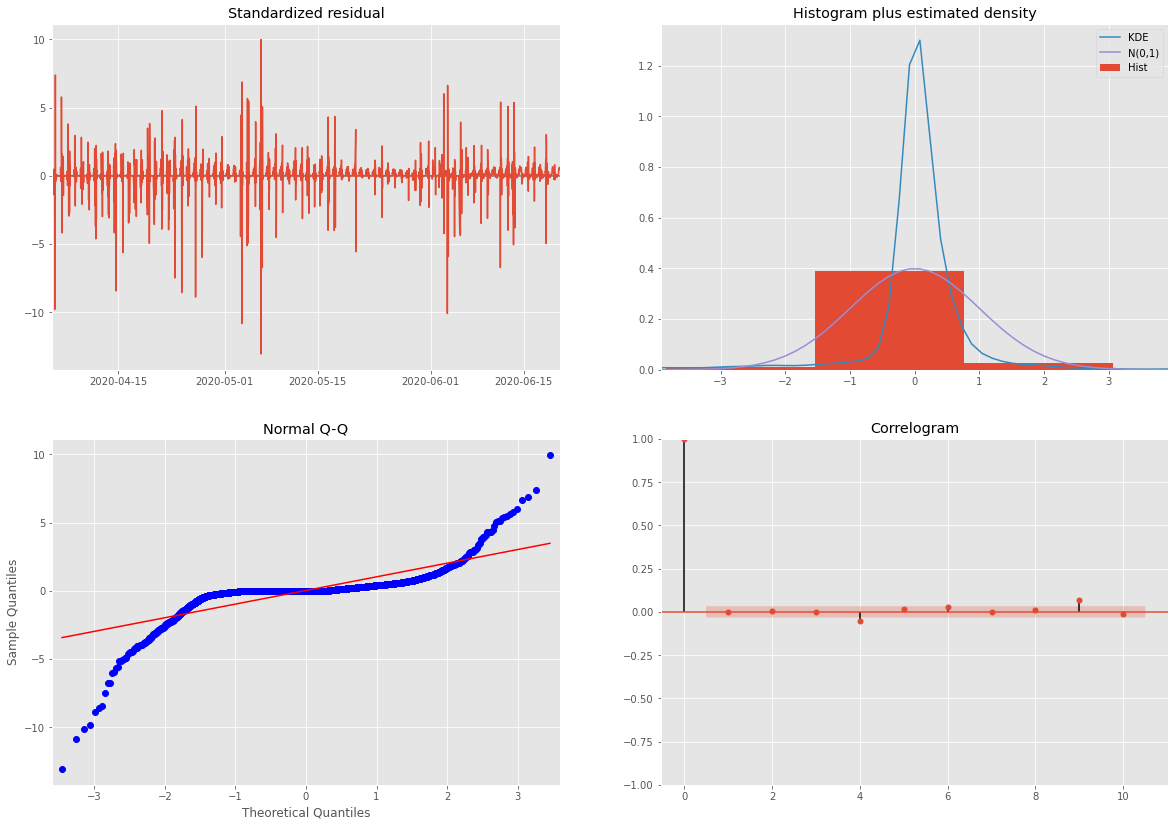

In [32]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:              Forecast for next day   No. Observations:                 3861
Model:             SARIMAX(3, 0, 1)x(3, 1, 1, 48)   Log Likelihood                4756.446
Date:                            Wed, 05 Aug 2020   AIC                          -9494.891
Time:                                    00:02:45   BIC                          -9439.030
Sample:                                04-01-2020   HQIC                         -9475.002
                                     - 06-20-2020                                         
Covariance Type:                           approx                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4508      0.295      1.530      0.126      -0.127       1.028
ar.L2          0.2307      0.199      1.157      0.247      -0.160       0.622
ar.L3         -0.0290      0.026     -1.123      0.261      -0.080       0.022
ma.L1          0.2574      0.294      0.875      0.382      -0.319       0.834
ar.S.L48      -0.0092      0.017     -0.530      0.596      -0.043       0.025
ar.S.L96      -0.0346      0.017     -2.011      0.044      -0.068      -0.001
ar.S.L144     -0.0171      0.017     -0.991      0.322      -0.051       0.017
ma.S.L48      -0.9645      0.008   -114.913      0.000      -0.981      -0.948
sigma2         0.0042   9.95e-05     42.447      0.000       0.004       0.004
===================================================================================
Ljung-Box (Q):                       55.99   Jarque-Bera (JB):            189300.24
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -2.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [34]:
results.save('model.pkl')

In [35]:
forecast_1= results.forecast(steps=test_data-1, exog=test_X)


In [37]:
act= pd.DataFrame(scaler_output.iloc[len(train_X):, 0])

In [42]:
train_size = len(train_X)
test_size = len(test_X)

In [43]:
predictions= results.predict(start =train_size, end=train_size+test_size-1,exog=test_X)

In [45]:
act.head()

,Forecast for next day
Date/Time Stamp,
2020-06-20 10:30:00,0.954566
2020-06-20 11:00:00,0.980259
2020-06-20 11:30:00,0.978984
2020-06-20 12:00:00,0.970186
2020-06-20 12:30:00,0.968542


          Pred    Actual
3861  0.905802  0.954566
3862  0.921665  0.980259
3863  0.904935  0.978984
3864  0.891488  0.970186
3865  0.880167  0.968542


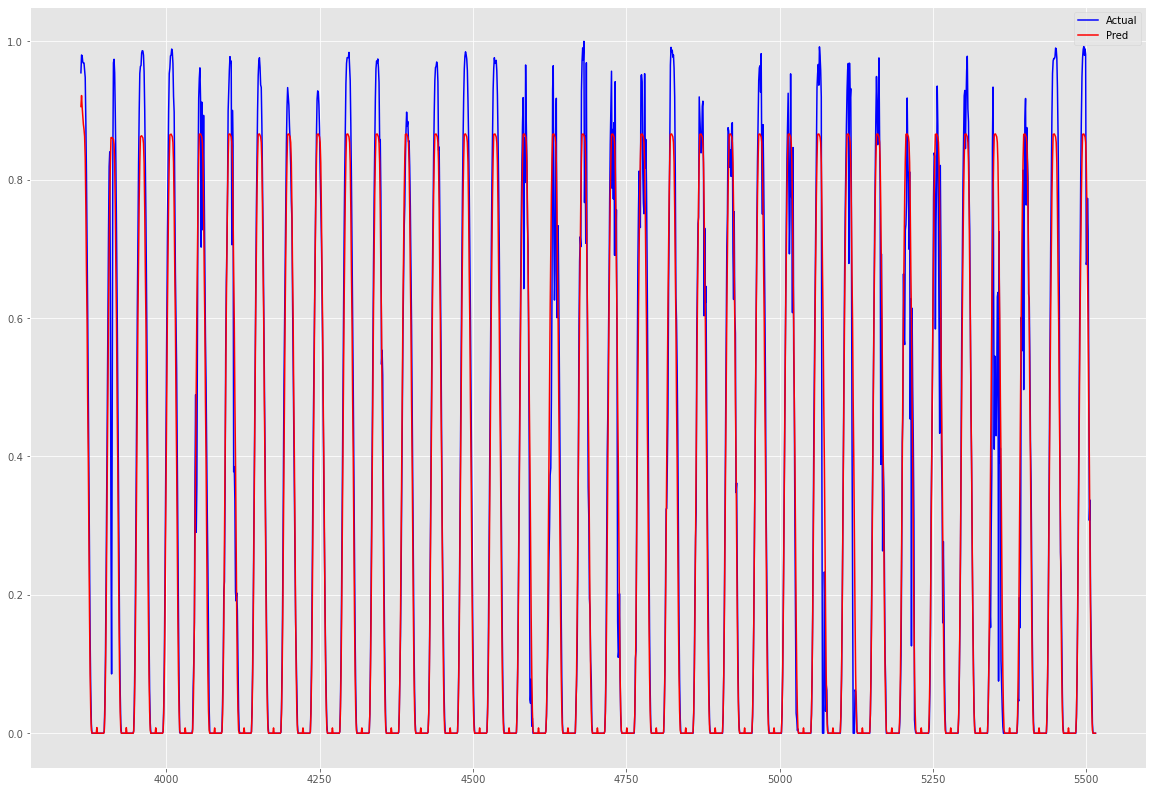

In [50]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions['Actual'] = act.values[:,0]
predictions.rename(columns={0:'Pred'}, inplace=True)
#we now plot the Actual and the predicted data
predictions['Actual'].plot(figsize=(20,14), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(20,14))
print(predictions.head())

In [ ]:
forecast_apple= pd.DataFrame(forecast_1)
forecast_apple.reset_index(drop=True, inplace=True)
forecast_apple.index=test_X.index
forecast_apple[‘Actual’] =scaler_output.iloc[train_data:, 0]
forecast_apple.rename(columns={0:’Forecast’}, inplace=True)
#Plotting the forecast
forecast_apple[‘Forecast’].plot(legend=True)
forecast_apple[‘Actual’].plot(legend=True)

In [51]:
from statsmodels.tools.eval_measures import rmse
error=rmse(predictions['Pred'], predictions['Actual'])
error

0.08705071551191267

In [32]:
#pred0 = results.get_prediction(start='2020-07-23 00:00:00', dynamic=False)
#pred0_ci = pred0.conf_int()
#print(pred0.predicted_mean)

Date/Time Stamp
2020-07-23 00:00:00    2.366340e-01
2020-07-23 00:30:00   -1.642074e-01
2020-07-23 01:00:00   -1.512887e-02
2020-07-23 01:30:00    1.404789e-02
2020-07-23 02:00:00   -3.148053e-03
2020-07-23 02:30:00    7.099172e-04
2020-07-23 03:00:00   -1.572291e-04
2020-07-23 03:30:00    3.482230e-05
2020-07-23 04:00:00   -7.712063e-06
2020-07-23 04:30:00    1.708020e-06
2020-07-23 05:00:00   -3.773411e-07
2020-07-23 05:30:00    8.979092e-08
2020-07-23 06:00:00    1.412139e-01
2020-07-23 06:30:00    2.953057e+00
2020-07-23 07:00:00    8.664513e+00
2020-07-23 07:30:00    1.747720e+01
2020-07-23 08:00:00    3.092990e+01
2020-07-23 08:30:00    4.377558e+01
2020-07-23 09:00:00    5.803496e+01
2020-07-23 09:30:00    7.157425e+01
2020-07-23 10:00:00    8.170091e+01
2020-07-23 10:30:00    9.008962e+01
2020-07-23 11:00:00    9.760094e+01
2020-07-23 11:30:00    9.897514e+01
2020-07-23 12:00:00    1.000072e+02
2020-07-23 12:30:00    1.010933e+02
2020-07-23 13:00:00    9.903119e+01
2020-07-23 1

In [33]:
#pred2 = results.get_forecast('2020-07-24 23:00:00')
#pred2_ci = pred2.conf_int()
#print(pred2.predicted_mean['2020-07-24 00:00:00':'2020-07-24 23:00:00'])

2020-07-24 00:00:00    2.274551e-01
2020-07-24 00:30:00    4.803200e-04
2020-07-24 01:00:00    2.636262e-04
2020-07-24 01:30:00   -6.579102e-06
2020-07-24 02:00:00   -3.288807e-06
2020-07-24 02:30:00   -2.976008e-06
2020-07-24 03:00:00   -1.824243e-06
2020-07-24 03:30:00   -1.361760e-06
2020-07-24 04:00:00   -9.056737e-07
2020-07-24 04:30:00   -6.419982e-07
2020-07-24 05:00:00   -4.380149e-07
2020-07-24 05:30:00   -2.998039e-07
2020-07-24 06:00:00    1.357334e-01
2020-07-24 06:30:00    3.039892e+00
2020-07-24 07:00:00    9.084316e+00
2020-07-24 07:30:00    1.789237e+01
2020-07-24 08:00:00    3.041162e+01
2020-07-24 08:30:00    4.230940e+01
2020-07-24 09:00:00    5.446583e+01
2020-07-24 09:30:00    6.641927e+01
2020-07-24 10:00:00    7.645745e+01
2020-07-24 10:30:00    8.426099e+01
2020-07-24 11:00:00    9.012119e+01
2020-07-24 11:30:00    9.120617e+01
2020-07-24 12:00:00    9.175873e+01
2020-07-24 12:30:00    9.275188e+01
2020-07-24 13:00:00    9.157756e+01
2020-07-24 13:30:00    9.374

In [34]:
#pred3 = results.get_forecast('2020-07-30 23:00:00')
#pred3_ci = pred2.conf_int()

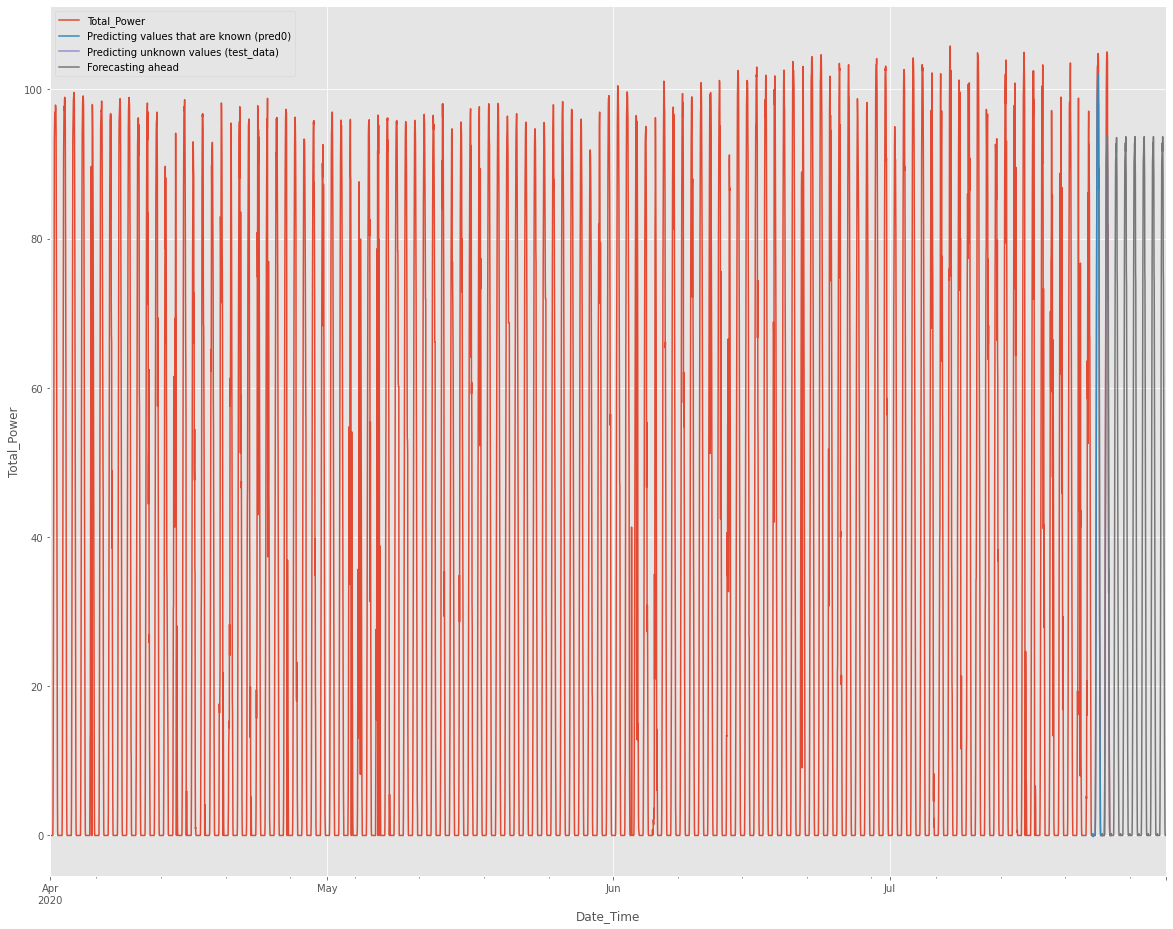

In [35]:
ax = df.plot(figsize=(20, 16))
pred0.predicted_mean.plot(ax=ax, label='Predicting values that are known (pred0)')
pred2.predicted_mean.plot(ax=ax, label='Predicting unknown values (test_data)')
pred3.predicted_mean.plot(ax=ax, label='Forecasting ahead')
plt.ylabel('Total_Power')
plt.xlabel('Date_Time')
plt.legend()
plt.show()

In [36]:
#prediction = pred2.predicted_mean.values
# flatten nested list
#truth = list(itertools.chain.from_iterable(test_data.values))
# Mean Absolute Percentage Error

In [37]:
#print(prediction, truth)

[ 3.38636271e-06  2.27455133e-01  4.80320012e-04  2.63626238e-04
 -6.57910206e-06 -3.28880743e-06 -2.97600819e-06 -1.82424296e-06
 -1.36175965e-06 -9.05673745e-07 -6.41998233e-07 -4.38014858e-07
 -2.99803898e-07  1.35733409e-01  3.03989213e+00  9.08431589e+00
  1.78923656e+01  3.04116224e+01  4.23094023e+01  5.44658314e+01
  6.64192716e+01  7.64574541e+01  8.42609915e+01  9.01211945e+01
  9.12061711e+01  9.17587257e+01  9.27518809e+01  9.15775609e+01
  9.37434009e+01  9.06621045e+01  8.83812818e+01  7.56215074e+01
  7.38287118e+01  6.01728351e+01  5.04993885e+01  4.01411721e+01
  2.95046607e+01  2.07198306e+01  1.12976227e+01  5.11419945e+00
  1.02264167e+00  7.75287660e-03  7.95389701e-09  2.17570530e-09
  8.20119892e-10 -4.18211118e-10 -7.93720140e-10 -4.14804992e-09] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.384, 8.685, 19.534000000000002, 32.961, 47.464, 61.839, 74.484, 85.536, 94.074, 100.381, 103.351, 104.603, 105.025, 103.69, 104.66799999999999, 103.826